In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
import os 

from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80

In [2]:
os.getcwd()

'C:\\Users\\pedne\\Python\\class-py'

In [3]:
os.chdir('C:\\Users\\pedne\\Python\\Competition\\jobathon')

In [4]:
# #Step 1 : Load train, test and submission file, prepare submission dataframe for final submission and drop unwanted columnns

data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submission.csv")

In [5]:
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(data.shape, test.shape))

Train dataset shape: (50882, 14), 
Test dataset shape: (21805, 13)


In [6]:
#Prepare submission File
submission = pd.DataFrame()
submission['ID'] = test['ID']

In [7]:
#Dropping unwanted columns - ID & Lower_Age
data.drop(['ID'],axis=1,inplace=True)
test.drop(['ID'],axis=1,inplace=True)

data.drop(['Lower_Age'],axis=1,inplace=True)
test.drop(['Lower_Age'],axis=1,inplace=True)

In [8]:
#Step 2 : Data Cleaning

#Repalce column names with space by "_"
# i.e. "Health Indicator" to be replaced by "Health_Indicator"
data.columns = map(lambda x : x.replace(" ", "_"), data.columns)
test.columns = map(lambda x : x.replace(" ", "_"), test.columns)

# Replace "14+" with "15.0" 
data['Holding_Policy_Duration'].replace(to_replace ="14+",value =15.0, inplace=True)
test['Holding_Policy_Duration'].replace(to_replace ="14+",value =15.0, inplace=True)

#Convert Holding_Policy_Duration to float
data['Holding_Policy_Duration']  = data['Holding_Policy_Duration'].astype('float')
test['Holding_Policy_Duration']  = test['Holding_Policy_Duration'].astype('float')

#Convert Holding_Policy_Type & Reco_Policy_Cat from numerical to object
data['Holding_Policy_Type']  = data['Holding_Policy_Type'].astype('object')
test['Holding_Policy_Type']  = test['Holding_Policy_Type'].astype('object')

data['Reco_Policy_Cat']  = data['Reco_Policy_Cat'].astype('object')
test['Reco_Policy_Cat']  = test['Reco_Policy_Cat'].astype('object')

In [9]:
#Step 3: Null Value Imputation

#Impute Health_Indicator = '0' as it is unknown
data['Health_Indicator'].value_counts().index[0]
data['Health_Indicator'].fillna('0', inplace=True)
test['Health_Indicator'].fillna('0', inplace=True)

#Impute Holding_Policy_Duration = '0.0' as it is unknown
data['Holding_Policy_Duration'].fillna(0.0, inplace=True)
test['Holding_Policy_Duration'].fillna(0.0, inplace=True)

#Impute Holding_Policy_Duration = '0' as it is unknown
data['Holding_Policy_Type'].fillna('0', inplace=True)
test['Holding_Policy_Type'].fillna('0', inplace=True)

<AxesSubplot:xlabel='Health_Indicator', ylabel='count'>

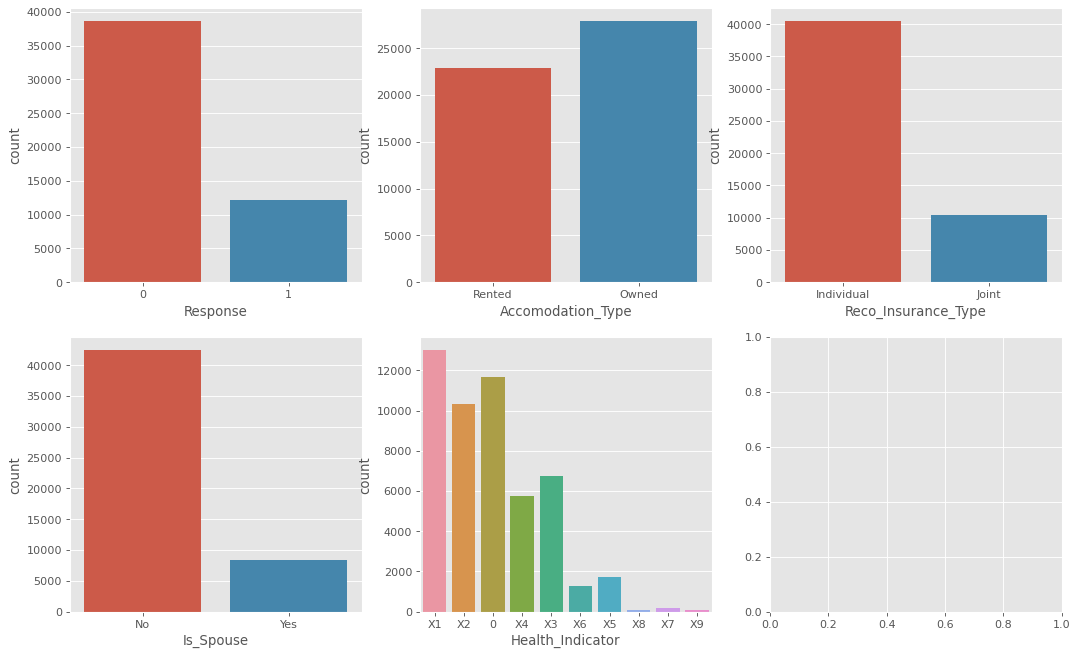

In [10]:
#Step 4: EDA

#Univariate Analysis: Columns - Response, Accomodation_Type, Reco_Insurance_Type, Is_Spouse, Health_Indicator

fig,ax = plt.subplots(2,3,figsize=(16,10))
sns.countplot('Response',data=data,ax=ax[0][0])
sns.countplot('Accomodation_Type',data=data,ax=ax[0][1])
sns.countplot('Reco_Insurance_Type',data=data,ax=ax[0][2])
sns.countplot('Is_Spouse',data=data,ax=ax[1][0])
sns.countplot('Health_Indicator',data=data,ax=ax[1][1])

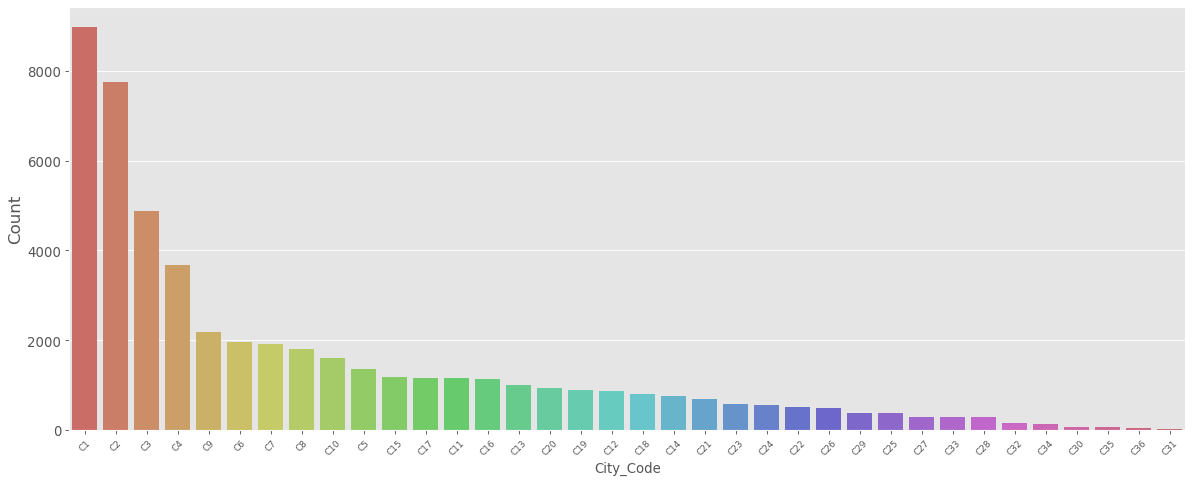

In [11]:
#Univariate Analysis: Columns -: 'City_Code'

cat_col_1 = ['City_Code']

for cols in cat_col_1:
    plt.figure(figsize=(18,7))
    sns.countplot(x=cols, order = data[cols].value_counts().index, data=data, palette="hls")
    plt.ylabel("Count", fontsize=15) # Seting the ytitle and size
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

C1 type i having maximum count and C31 is having lowest count

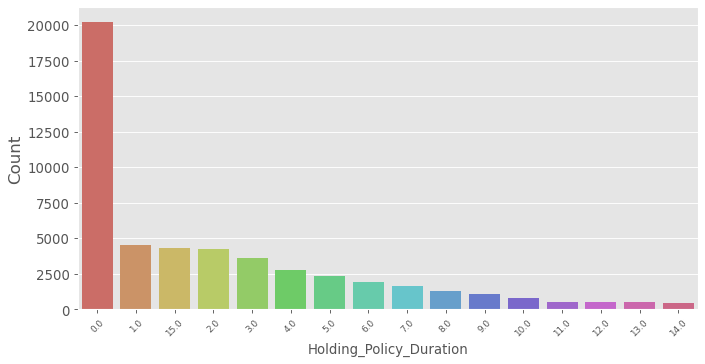

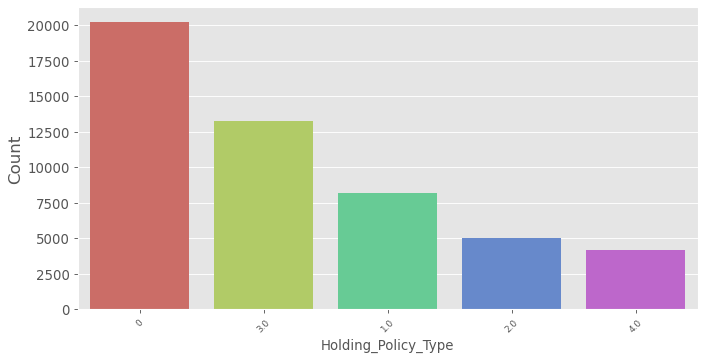

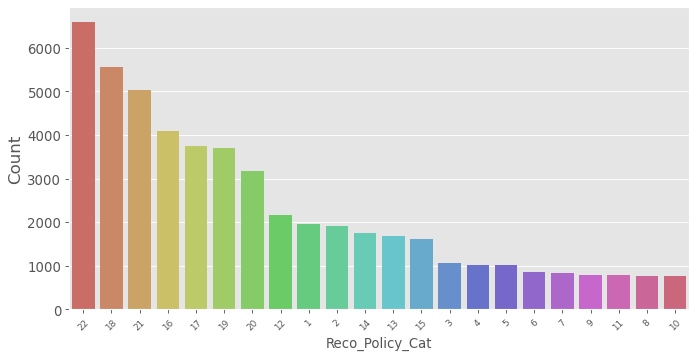

In [12]:
#Univariate Analysis : Column - 'Holding_Policy_Duration', 'Holding_Policy_Type','Reco_Policy_Cat'

cat_col_1 = ['Holding_Policy_Duration', 'Holding_Policy_Type','Reco_Policy_Cat']

for cols in cat_col_1:
    plt.figure(figsize=(10,5))
    sns.countplot(x=cols, order = data[cols].value_counts().index, data=data, palette="hls")
    plt.ylabel("Count", fontsize=15) # Seting the ytitle and size
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

Reco_Policy_Cat = 22 is having max count

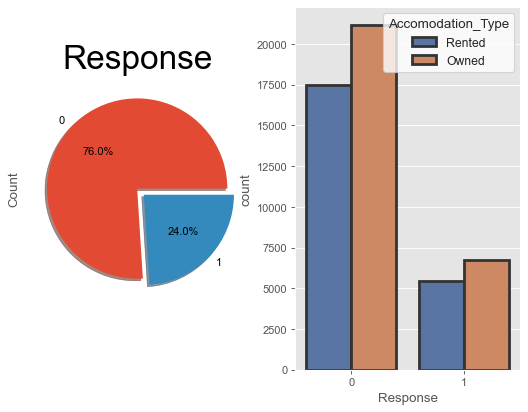

In [13]:
# Explore variable 'Accomodation_Type' with target variable - 'Response'

f,ax=plt.subplots(1,2,figsize=(8,6))
data['Response'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Response',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Response',hue='Accomodation_Type',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

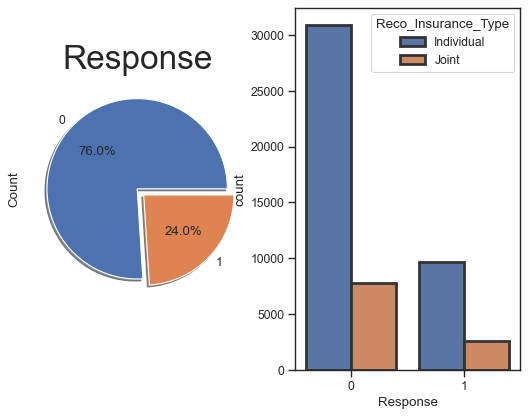

In [14]:
# Explore variable 'Reco_Insurance_Type' with target variable - 'Response'

f,ax=plt.subplots(1,2,figsize=(8,6))
data['Response'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Response',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Response',hue='Reco_Insurance_Type',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

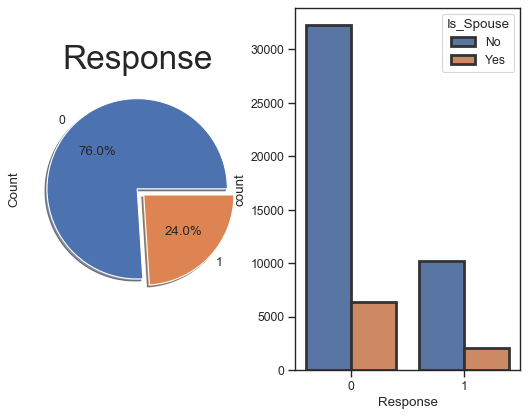

In [15]:
# Explore variable 'Is_Spouse' with target variable - 'Response'

f,ax=plt.subplots(1,2,figsize=(8,6))
data['Response'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Response',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Response',hue='Is_Spouse',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

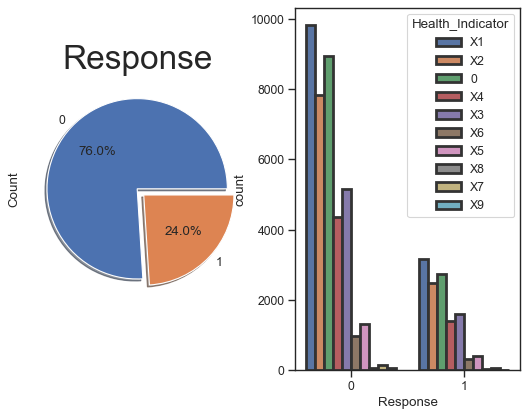

In [16]:
# Explore variable 'Health Indicator' with target variable - 'Response'

f,ax=plt.subplots(1,2,figsize=(8,6))
data['Response'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Response',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Response',hue='Health_Indicator',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

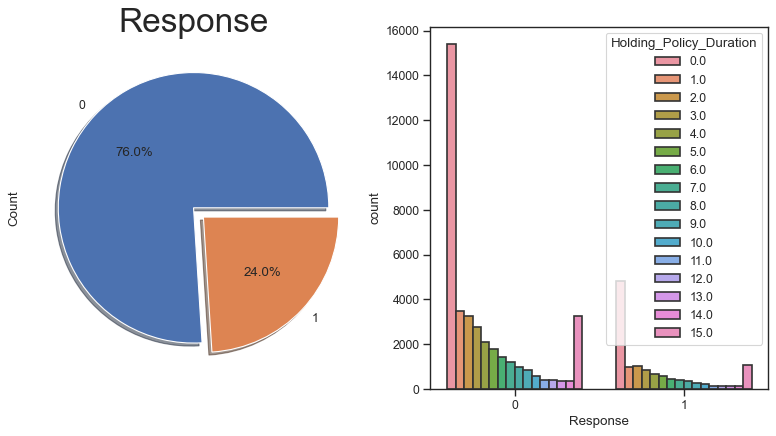

In [17]:
# Explore variable 'Holding_Policy_Duration' with target variable - 'Response'

f,ax=plt.subplots(1,2,figsize=(12,6))
data['Response'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Response',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Response',hue='Holding_Policy_Duration',linewidth=1.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

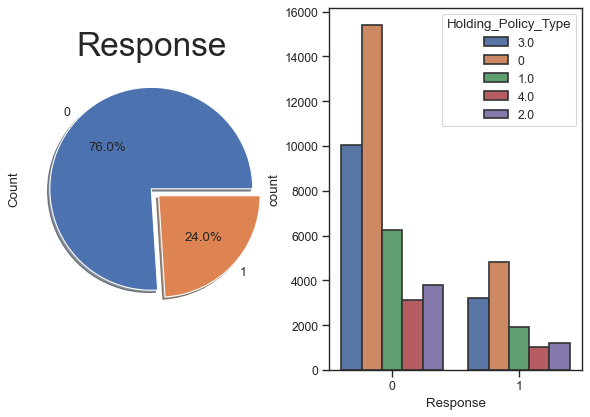

In [18]:
# Explore variable 'Holding_Policy_Type' with target variable - 'Response'

f,ax=plt.subplots(1,2,figsize=(9,6))
data['Response'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Response',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Response',hue='Holding_Policy_Type',linewidth=1.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

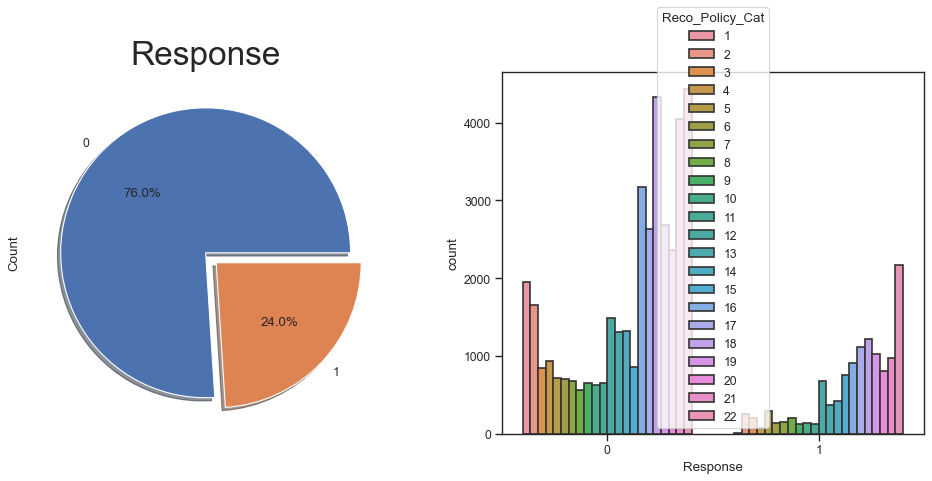

In [19]:
# Explore variable 'Reco_Policy_Cat' with target variable - 'Response'

f,ax=plt.subplots(1,2,figsize=(15,6))
data['Response'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Response',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Response',hue='Reco_Policy_Cat',linewidth=1.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

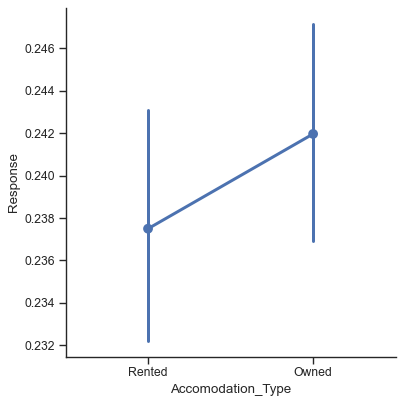

In [20]:
#Catplot - 'Accomodation_Type' Vs 'Response' 
sns.catplot(x='Accomodation_Type',y='Response',kind='point',data=data)

Owned category is having higher chance of giving Response = 1

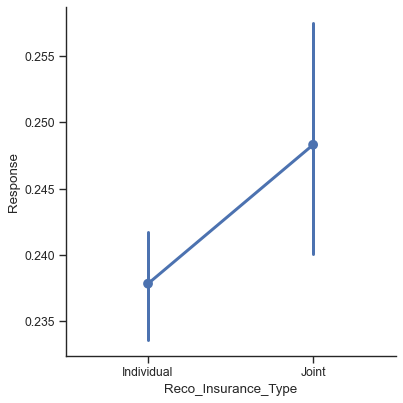

In [21]:
#Catplot - 'Reco_Insurance_Type' Vs 'Response' 
sns.catplot(x='Reco_Insurance_Type',y='Response',kind='point',data=data)

Joint category is having higher chance of giving Response = 1

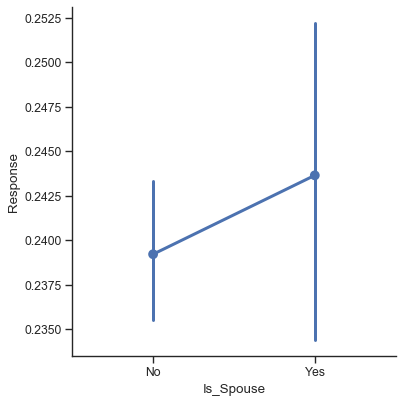

In [22]:
#Catplot - 'Is_Spouse' Vs 'Response' 
sns.catplot(x='Is_Spouse',y='Response',kind='point',data=data)

Married couples are having higher chance of giving Response = 1

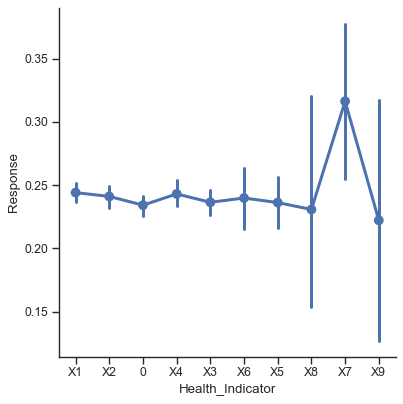

In [23]:
#Catplot - 'Health Indicator' Vs 'Response' 
sns.catplot(x='Health_Indicator',y='Response',kind='point',data=data)

Health_Indicator = "X7" is having higher chance of giving Response = 1

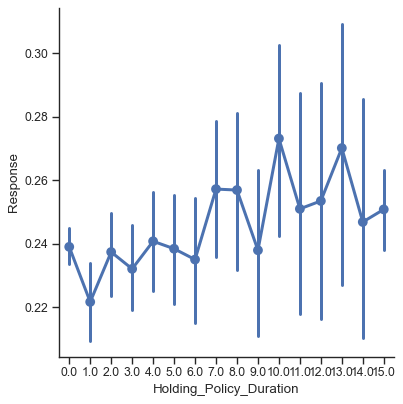

In [24]:
#Catplot - 'Holding_Policy_Duration' Vs 'Response' 
sns.catplot(x='Holding_Policy_Duration',y='Response',kind='point',data=data)

Holding_Policy_Duration = 10 are having higher chance of giving Response  = 1

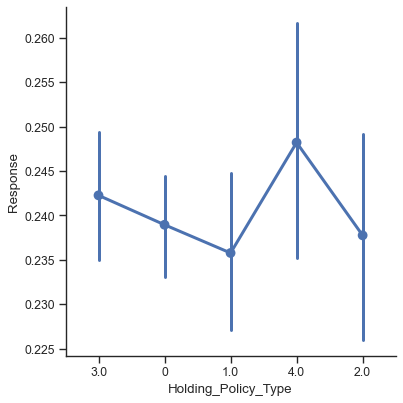

In [25]:
#Catplot - 'Holding_Policy_Type' Vs 'Response' 
sns.catplot(x='Holding_Policy_Type',y='Response',kind='point',data=data)

Holding_Policy_Type = 4.0 are having higher chance of giving Response = 1

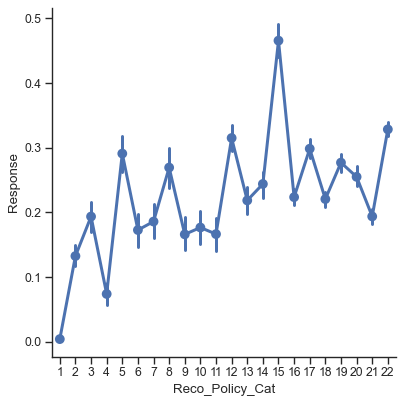

In [26]:
#Catplot - 'Reco_Policy_Cat' Vs 'Response' 
sns.catplot(x='Reco_Policy_Cat',y='Response',kind='point',data=data)

Reco_Policy_Cat = 15 are having higher chance of giving Response = 1

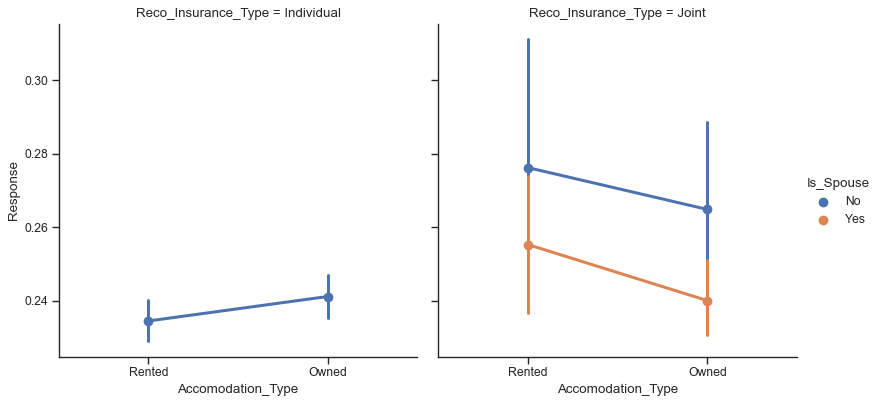

In [27]:
#Catplot - 'Accomodation_Type' Vs 'Response' with hue='Is_Spouse' and columns = 'Reco_Insurance_Type'
sns.catplot(x='Accomodation_Type',y='Response',kind='point',data=data,col='Reco_Insurance_Type',hue='Is_Spouse')

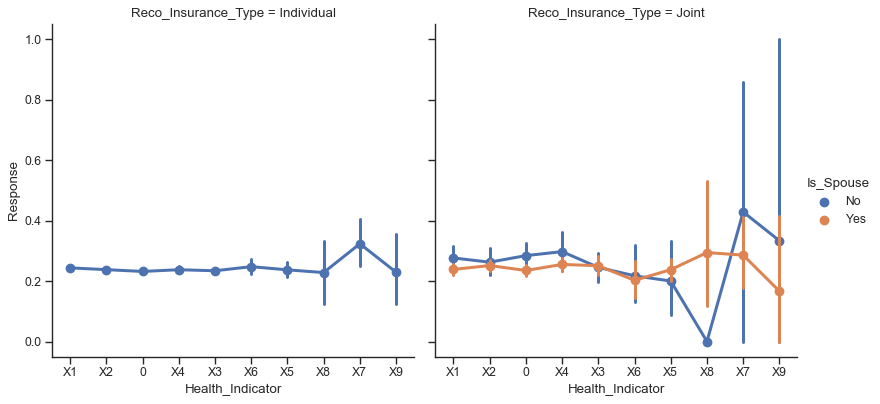

In [28]:
#Catplot - 'Health Indicator' Vs 'Response' with hue='Is_Spouse' and columns = 'Reco_Insurance_Type'
sns.catplot(x='Health_Indicator',y='Response',kind='point',data=data,col='Reco_Insurance_Type',hue='Is_Spouse')

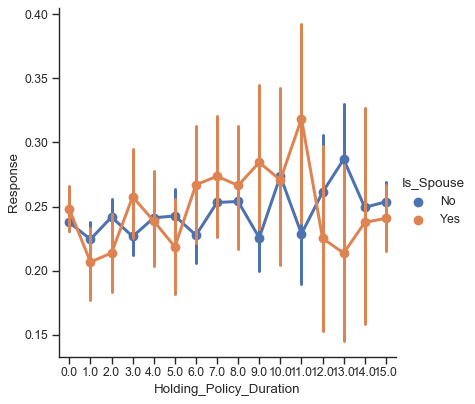

In [29]:
#Catplot - 'Holding_Policy_Duration' Vs 'Response' with hue='Is_Spouse' 
sns.catplot(x='Holding_Policy_Duration',y='Response',kind='point',data=data,hue='Is_Spouse')

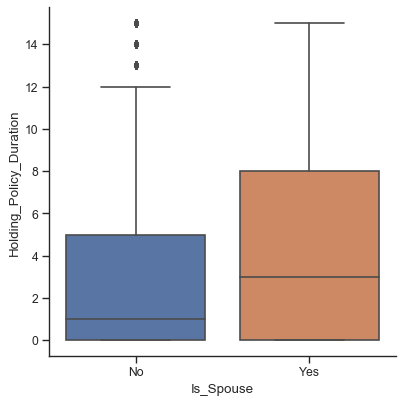

In [30]:
#Numerical Variable Analysis
# Variable - 'Is_Spouse'  Vs 'Holding_Policy_Duration'
sns.catplot(x='Is_Spouse',y='Holding_Policy_Duration',data=data,kind='box')

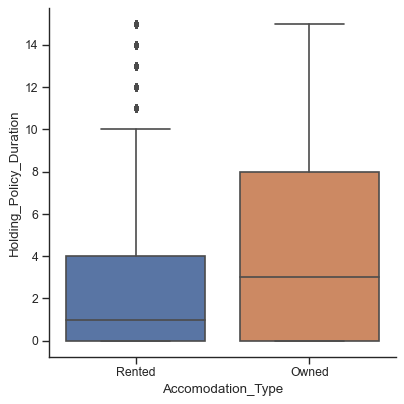

In [31]:
# Variable - 'Accomodation_Type'  Vs 'Holding_Policy_Duration'
sns.catplot(x='Accomodation_Type',y='Holding_Policy_Duration',data=data,kind='box')

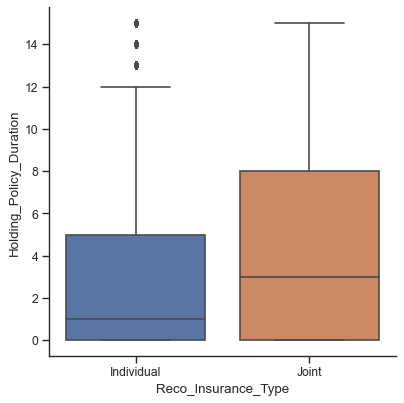

In [32]:
# Variable - 'Reco_Insurance_Type'  Vs 'Holding_Policy_Duration'
sns.catplot(x='Reco_Insurance_Type',y='Holding_Policy_Duration',data=data,kind='box')

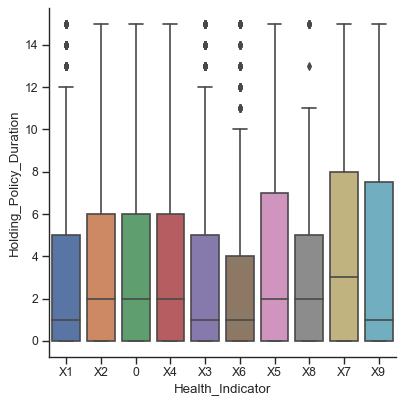

In [33]:
# Variable - 'Health_Indicator'  Vs 'Holding_Policy_Duration'
sns.catplot(x='Health_Indicator',y='Holding_Policy_Duration',data=data,kind='box')

X7 health indicator is having maximum holding policy duration

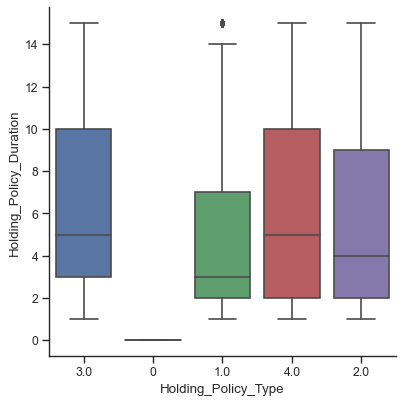

In [34]:
# Variable - 'Holding_Policy_Type'  Vs 'Holding_Policy_Duration'
sns.catplot(x='Holding_Policy_Type',y='Holding_Policy_Duration',data=data,kind='box')

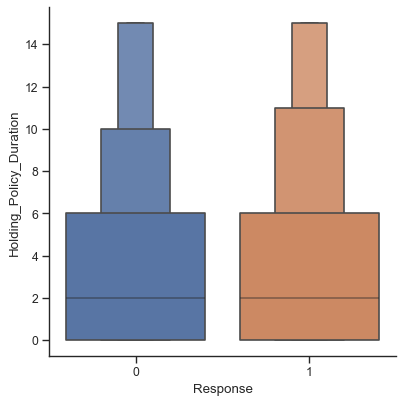

In [35]:
# Variable - 'Holding_Policy_Type'  Vs 'Holding_Policy_Duration'
sns.catplot(x='Response',y='Holding_Policy_Duration',data=data,kind='boxen')

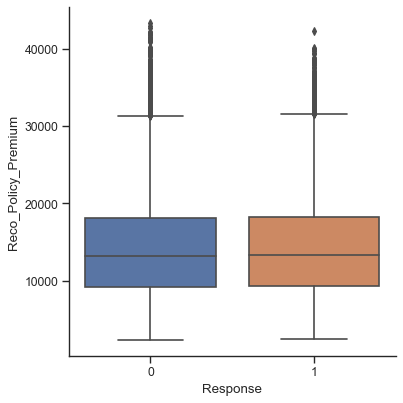

In [36]:
# Variable - 'Holding_Policy_Type'  Vs 'Holding_Policy_Duration'
sns.catplot(x='Response',y='Reco_Policy_Premium',data=data,kind='box')

We can see outliers in Reco policy premium

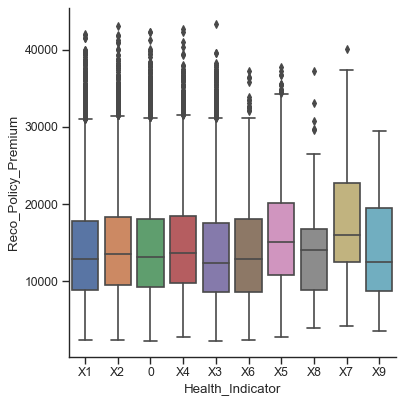

In [37]:
# Variable - 'Holding_Policy_Type'  Vs 'Holding_Policy_Duration'
sns.catplot(x='Health_Indicator',y='Reco_Policy_Premium',data=data,kind='box')

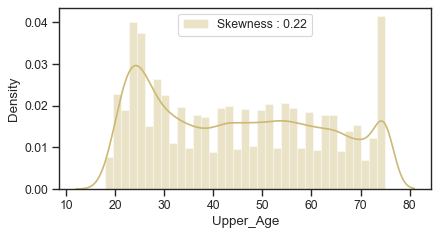

In [38]:
#check skewness for Upper_Age
g = sns.distplot(data["Upper_Age"], color="y", label="Skewness : %.2f"%(data["Upper_Age"].skew()))
g = g.legend(loc="best")

Distribution is not skewed

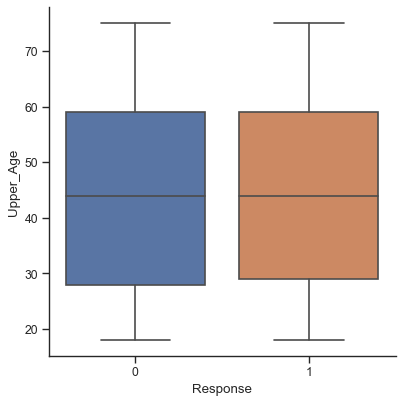

In [39]:
# Variable - 'Holding_Policy_Type'  Vs 'Holding_Policy_Duration'
sns.catplot(x='Response',y='Upper_Age',data=data,kind='box')

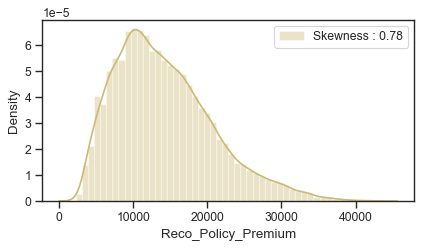

In [40]:
#check skewness for Reco_Policy_Premium
g = sns.distplot(data["Reco_Policy_Premium"], color="y", label="Skewness : %.2f"%(data["Reco_Policy_Premium"].skew()))
g = g.legend(loc="best")

Distribution is slightly skewed

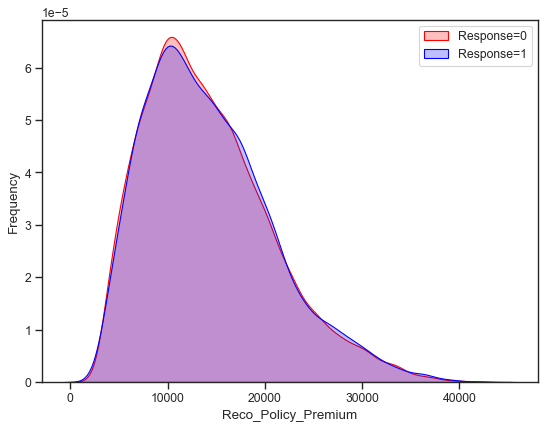

In [41]:
# Explore Size Vs Type using kde plots
plt.figure(figsize=(8, 6))
g = sns.kdeplot(data["Reco_Policy_Premium"].round(5)[(data["Response"] == 0) & (data["Reco_Policy_Premium"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data["Reco_Policy_Premium"].round(5)[(data["Response"] == 1) & (data["Reco_Policy_Premium"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Reco_Policy_Premium")
g.set_ylabel("Frequency")
g = g.legend(["Response=0","Response=1"])

In [42]:
#Step 5 : Feature Engineering

In [43]:
#Label Encode Reco_Insurance_Type
no_of_insured_dict = {'Individual':1, 'Joint':2}

data["Reco_Insurance_Type"] = data["Reco_Insurance_Type"].apply(lambda x: no_of_insured_dict[x])
test["Reco_Insurance_Type"] = test["Reco_Insurance_Type"].apply(lambda x: no_of_insured_dict[x])

In [44]:
#Add various features base on count , 25 percentle and 75 percentile

#Count
data["City_Code_Count"] = data.groupby(['City_Code'])['City_Code'].transform('count')
City_Code_count_dict = data.groupby(['City_Code']).size().to_dict()
test['City_Code_Count'] = test['City_Code'].apply(lambda x:City_Code_count_dict.get(x,0))

data["Region_Code_Count"] = data.groupby(['Region_Code'])['Region_Code'].transform('count')
Region_Code_count_dict = data.groupby(['Region_Code']).size().to_dict()
test['Region_Code_Count'] = test['Region_Code'].apply(lambda x:Region_Code_count_dict.get(x,0))

data["Reco_Insurance_Type_Count"] = data.groupby(['Reco_Insurance_Type'])['Reco_Insurance_Type'].transform('count')
Reco_Insurance_Type_count_dict = data.groupby(['Reco_Insurance_Type']).size().to_dict()
test['Reco_Insurance_Type_Count'] = test['Reco_Insurance_Type'].apply(lambda x:Reco_Insurance_Type_count_dict.get(x,0))

data["Health_Indicator_Count"] = data.groupby(['Health_Indicator'])['Health_Indicator'].transform('count')
Health_Indicator_count_dict = data.groupby(['Health_Indicator']).size().to_dict()
test['Health_Indicator_Count'] = test['Health_Indicator'].apply(lambda x:Health_Indicator_count_dict.get(x,0))

data["Holding_Policy_Duration_Count"] = data.groupby(['Holding_Policy_Duration'])['Holding_Policy_Duration'].transform('count')
Holding_Policy_Duration_count_dict = data.groupby(['Holding_Policy_Duration']).size().to_dict()
test['Holding_Policy_Duration_Count'] = test['Holding_Policy_Duration'].apply(lambda x:Holding_Policy_Duration_count_dict.get(x,0))

data["Holding_Policy_Type_Count"] = data.groupby(['Holding_Policy_Type'])['Holding_Policy_Type'].transform('count')
Holding_Policy_Type_count_dict = data.groupby(['Holding_Policy_Type']).size().to_dict()
test['Holding_Policy_Type_Count'] = test['Holding_Policy_Type'].apply(lambda x:Holding_Policy_Type_count_dict.get(x,0))

data["Reco_Policy_Cat_Count"] = data.groupby(['Reco_Policy_Cat'])['Reco_Policy_Cat'].transform('count')
Reco_Policy_Cat_count_dict = data.groupby(['Reco_Policy_Cat']).size().to_dict()
test['Reco_Policy_Cat_Count'] = test['Reco_Policy_Cat'].apply(lambda x:Reco_Policy_Cat_count_dict.get(x,0))

#25p
City_Code_25p_dict = data.groupby(['City_Code'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,25)).to_dict()
data['City_Code_25PercPrice'] = data['City_Code'].apply(lambda x:City_Code_25p_dict.get(x,0))
test['City_Code_25PercPrice'] = test['City_Code'].apply(lambda x:City_Code_25p_dict.get(x,0))

Region_Code_25p_dict = data.groupby(['Region_Code'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,25)).to_dict()
data['Region_Code_25PercPrice'] = data['Region_Code'].apply(lambda x:Region_Code_25p_dict.get(x,0))
test['Region_Code_25PercPrice'] = test['Region_Code'].apply(lambda x:Region_Code_25p_dict.get(x,0))

Reco_Insurance_Type_25p_dict = data.groupby(['Reco_Insurance_Type'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,25)).to_dict()
data['Reco_Insurance_Type_25PercPrice'] = data['Reco_Insurance_Type'].apply(lambda x:Reco_Insurance_Type_25p_dict.get(x,0))
test['Reco_Insurance_Type_25PercPrice'] = test['Reco_Insurance_Type'].apply(lambda x:Reco_Insurance_Type_25p_dict.get(x,0))

Health_Indicator_25p_dict = data.groupby(['Health_Indicator'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,25)).to_dict()
data['Health_Indicator_25PercPrice'] = data['Health_Indicator'].apply(lambda x:Health_Indicator_25p_dict.get(x,0))
test['Health_Indicator_25PercPrice'] = test['Health_Indicator'].apply(lambda x:Health_Indicator_25p_dict.get(x,0))

Holding_Policy_Duration_25p_dict = data.groupby(['Holding_Policy_Duration'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,25)).to_dict()
data['Holding_Policy_Duration_25PercPrice'] = data['Holding_Policy_Duration'].apply(lambda x:Holding_Policy_Duration_25p_dict.get(x,0))
test['Holding_Policy_Duration_25PercPrice'] = test['Holding_Policy_Duration'].apply(lambda x:Holding_Policy_Duration_25p_dict.get(x,0))

Holding_Policy_Type_25p_dict = data.groupby(['Holding_Policy_Type'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,25)).to_dict()
data['Holding_Policy_Type_25PercPrice'] = data['Holding_Policy_Type'].apply(lambda x:Holding_Policy_Type_25p_dict.get(x,0))
test['Holding_Policy_Type_25PercPrice'] = test['Holding_Policy_Type'].apply(lambda x:Holding_Policy_Type_25p_dict.get(x,0))

Reco_Policy_Cat_25p_dict = data.groupby(['Reco_Policy_Cat'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,25)).to_dict()
data['Reco_Policy_Cat_25PercPrice'] = data['Reco_Policy_Cat'].apply(lambda x:Reco_Policy_Cat_25p_dict.get(x,0))
test['Reco_Policy_Cat_25PercPrice'] = test['Reco_Policy_Cat'].apply(lambda x:Reco_Policy_Cat_25p_dict.get(x,0))

#75p
City_Code_75p_dict = data.groupby(['City_Code'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,75)).to_dict()
data['City_Code_75PercPrice'] = data['City_Code'].apply(lambda x:City_Code_75p_dict.get(x,0))
test['City_Code_75PercPrice'] = test['City_Code'].apply(lambda x:City_Code_75p_dict.get(x,0))

Region_Code_75p_dict = data.groupby(['Region_Code'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,75)).to_dict()
data['Region_Code_75PercPrice'] = data['Region_Code'].apply(lambda x:Region_Code_75p_dict.get(x,0))
test['Region_Code_75PercPrice'] = test['Region_Code'].apply(lambda x:Region_Code_75p_dict.get(x,0))

Reco_Insurance_Type_75p_dict = data.groupby(['Reco_Insurance_Type'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,75)).to_dict()
data['Reco_Insurance_Type_75PercPrice'] = data['Reco_Insurance_Type'].apply(lambda x:Reco_Insurance_Type_75p_dict.get(x,0))
test['Reco_Insurance_Type_75PercPrice'] = test['Reco_Insurance_Type'].apply(lambda x:Reco_Insurance_Type_75p_dict.get(x,0))

Health_Indicator_75p_dict = data.groupby(['Health_Indicator'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,75)).to_dict()
data['Health_Indicator_75PercPrice'] = data['Health_Indicator'].apply(lambda x:Health_Indicator_75p_dict.get(x,0))
test['Health_Indicator_75PercPrice'] = test['Health_Indicator'].apply(lambda x:Health_Indicator_75p_dict.get(x,0))

Holding_Policy_Duration_75p_dict = data.groupby(['Holding_Policy_Duration'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,75)).to_dict()
data['Holding_Policy_Duration_75PercPrice'] = data['Holding_Policy_Duration'].apply(lambda x:Holding_Policy_Duration_75p_dict.get(x,0))
test['Holding_Policy_Duration_75PercPrice'] = test['Holding_Policy_Duration'].apply(lambda x:Holding_Policy_Duration_75p_dict.get(x,0))

Holding_Policy_Type_75p_dict = data.groupby(['Holding_Policy_Type'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,75)).to_dict()
data['Holding_Policy_Type_75PercPrice'] = data['Holding_Policy_Type'].apply(lambda x:Holding_Policy_Type_75p_dict.get(x,0))
test['Holding_Policy_Type_75PercPrice'] = test['Holding_Policy_Type'].apply(lambda x:Holding_Policy_Type_75p_dict.get(x,0))

Reco_Policy_Cat_75p_dict = data.groupby(['Reco_Policy_Cat'])['Reco_Policy_Premium'].apply(lambda x:np.percentile(x,75)).to_dict()
data['Reco_Policy_Cat_75PercPrice'] = data['Reco_Policy_Cat'].apply(lambda x:Reco_Policy_Cat_75p_dict.get(x,0))
test['Reco_Policy_Cat_75PercPrice'] = test['Reco_Policy_Cat'].apply(lambda x:Reco_Policy_Cat_75p_dict.get(x,0))


In [45]:
#Combine train and test datasets
combine_set=pd.concat([data,test], ignore_index=True)
combine_set.shape

(72687, 33)

In [46]:
#Create Bins
from sklearn.preprocessing import KBinsDiscretizer

#Upper_Age Bins
Upper_Age_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
combine_set['Upper_Age_Bins'] = Upper_Age_discretizer.fit_transform(combine_set['Upper_Age'].values.reshape(-1,1)).astype(float)

#Reco_Policy_Premium Bins
Reco_Policy_Premium_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
combine_set['Reco_Policy_Premium_Bins'] = Reco_Policy_Premium_discretizer.fit_transform(combine_set['Reco_Policy_Premium'].values.reshape(-1,1)).astype(float)

#Holding_Policy_Duration Bins
Holding_Policy_Duration_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
combine_set['Holding_Policy_Duration_Bins'] = Holding_Policy_Duration_discretizer.fit_transform(combine_set['Holding_Policy_Duration'].values.reshape(-1,1)).astype(float)

#Region_Code Bins
Region_Code_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
combine_set['Region_Code_Bins'] = Region_Code_discretizer.fit_transform(combine_set['Region_Code'].values.reshape(-1,1)).astype(float)


In [47]:
#Add new features based upon the mean,min,max & sum values of numerical columns 

#Reco_Policy_Premium wise mean of categorical variables

#mean
combine_set['Reco_Insurance_Type_Reco_Policy_Premium_mean']=combine_set.groupby(['Reco_Insurance_Type'])['Reco_Policy_Premium'].transform('mean')
combine_set['Health_Indicator_Reco_Policy_Premium_mean']=combine_set.groupby(['Health_Indicator'])['Reco_Policy_Premium'].transform('mean')
combine_set['Holding_Policy_Duration_Reco_Policy_Premium_mean']=combine_set.groupby(['Holding_Policy_Duration'])['Reco_Policy_Premium'].transform('mean')
combine_set['Holding_Policy_Type_Reco_Policy_Premium_mean']=combine_set.groupby(['Holding_Policy_Type'])['Reco_Policy_Premium'].transform('mean')
combine_set['Reco_Policy_Cat_Reco_Policy_Premium_mean']=combine_set.groupby(['Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('mean')
combine_set['Region_Code_Reco_Policy_Premium_mean']=combine_set.groupby(['Region_Code'])['Reco_Policy_Premium'].transform('mean')
combine_set['City_Code_Reco_Policy_Premium_mean']=combine_set.groupby(['City_Code'])['Reco_Policy_Premium'].transform('mean')

#min
combine_set['Reco_Insurance_Type_Reco_Policy_Premium_min']=combine_set.groupby(['Reco_Insurance_Type'])['Reco_Policy_Premium'].transform('min')
combine_set['Health_Indicator_Reco_Policy_Premium_min']=combine_set.groupby(['Health_Indicator'])['Reco_Policy_Premium'].transform('min')
combine_set['Holding_Policy_Duration_Reco_Policy_Premium_min']=combine_set.groupby(['Holding_Policy_Duration'])['Reco_Policy_Premium'].transform('min')
combine_set['Holding_Policy_Type_Reco_Policy_Premium_min']=combine_set.groupby(['Holding_Policy_Type'])['Reco_Policy_Premium'].transform('min')
combine_set['Reco_Policy_Cat_Reco_Policy_Premium_min']=combine_set.groupby(['Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('min')
combine_set['Region_Code_Reco_Policy_Premium_min']=combine_set.groupby(['Region_Code'])['Reco_Policy_Premium'].transform('min')
combine_set['City_Code_Reco_Policy_Premium_min']=combine_set.groupby(['City_Code'])['Reco_Policy_Premium'].transform('min')

#max
combine_set['Reco_Insurance_Type_Reco_Policy_Premium_max']=combine_set.groupby(['Reco_Insurance_Type'])['Reco_Policy_Premium'].transform('max')
combine_set['Health_Indicator_Reco_Policy_Premium_max']=combine_set.groupby(['Health_Indicator'])['Reco_Policy_Premium'].transform('max')
combine_set['Holding_Policy_Duration_Reco_Policy_Premium_max']=combine_set.groupby(['Holding_Policy_Duration'])['Reco_Policy_Premium'].transform('max')
combine_set['Holding_Policy_Type_Reco_Policy_Premium_max']=combine_set.groupby(['Holding_Policy_Type'])['Reco_Policy_Premium'].transform('max')
combine_set['Reco_Policy_Cat_Reco_Policy_Premium_max']=combine_set.groupby(['Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('max')
combine_set['Region_Code_Reco_Policy_Premium_max']=combine_set.groupby(['Region_Code'])['Reco_Policy_Premium'].transform('max')
combine_set['City_Code_Reco_Policy_Premium_max']=combine_set.groupby(['City_Code'])['Reco_Policy_Premium'].transform('max')

#sum
combine_set['Reco_Insurance_Type_Reco_Policy_Premium_sum']=combine_set.groupby(['Reco_Insurance_Type'])['Reco_Policy_Premium'].transform('sum')
combine_set['Health_Indicator_Reco_Policy_Premium_sum']=combine_set.groupby(['Health_Indicator'])['Reco_Policy_Premium'].transform('sum')
combine_set['Holding_Policy_Duration_Reco_Policy_Premium_sum']=combine_set.groupby(['Holding_Policy_Duration'])['Reco_Policy_Premium'].transform('sum')
combine_set['Holding_Policy_Type_Reco_Policy_Premium_sum']=combine_set.groupby(['Holding_Policy_Type'])['Reco_Policy_Premium'].transform('sum')
combine_set['Reco_Policy_Cat_Reco_Policy_Premium_sum']=combine_set.groupby(['Reco_Policy_Cat'])['Reco_Policy_Premium'].transform('sum')
combine_set['Region_Code_Reco_Policy_Premium_sum']=combine_set.groupby(['Region_Code'])['Reco_Policy_Premium'].transform('sum')
combine_set['City_Code_Reco_Policy_Premium_sum']=combine_set.groupby(['City_Code'])['Reco_Policy_Premium'].transform('sum')

#Upper_Age wise mean of categorical variables

#mean
combine_set['Reco_Insurance_Type_Upper_Age_mean']=combine_set.groupby(['Reco_Insurance_Type'])['Upper_Age'].transform('mean')
combine_set['Health_Indicator_Upper_Age_mean']=combine_set.groupby(['Health_Indicator'])['Upper_Age'].transform('mean')
combine_set['Holding_Policy_Duration_Upper_Age_mean']=combine_set.groupby(['Holding_Policy_Duration'])['Upper_Age'].transform('mean')
combine_set['Holding_Policy_Type_Upper_Age_mean']=combine_set.groupby(['Holding_Policy_Type'])['Upper_Age'].transform('mean')
combine_set['Reco_Policy_Cat_Upper_Age_mean']=combine_set.groupby(['Reco_Policy_Cat'])['Upper_Age'].transform('mean')
combine_set['Region_Code_Upper_Age_mean']=combine_set.groupby(['Region_Code'])['Upper_Age'].transform('mean')
combine_set['City_Code_Upper_Age_mean']=combine_set.groupby(['City_Code'])['Upper_Age'].transform('mean')

#min
combine_set['Reco_Insurance_Type_Upper_Age_min']=combine_set.groupby(['Reco_Insurance_Type'])['Upper_Age'].transform('min')
combine_set['Health_Indicator_Upper_Age_min']=combine_set.groupby(['Health_Indicator'])['Upper_Age'].transform('min')
combine_set['Holding_Policy_Duration_Upper_Age_min']=combine_set.groupby(['Holding_Policy_Duration'])['Upper_Age'].transform('min')
combine_set['Holding_Policy_Type_Upper_Age_min']=combine_set.groupby(['Holding_Policy_Type'])['Upper_Age'].transform('min')
combine_set['Reco_Policy_Cat_Upper_Age_min']=combine_set.groupby(['Reco_Policy_Cat'])['Upper_Age'].transform('min')
combine_set['Region_Code_Upper_Age_min']=combine_set.groupby(['Region_Code'])['Upper_Age'].transform('min')
combine_set['City_Code_Upper_Age_min']=combine_set.groupby(['City_Code'])['Upper_Age'].transform('min')

#max
combine_set['Reco_Insurance_Type_Upper_Age_max']=combine_set.groupby(['Reco_Insurance_Type'])['Upper_Age'].transform('max')
combine_set['Health_Indicator_Upper_Age_max']=combine_set.groupby(['Health_Indicator'])['Upper_Age'].transform('max')
combine_set['Holding_Policy_Duration_Upper_Age_max']=combine_set.groupby(['Holding_Policy_Duration'])['Upper_Age'].transform('max')
combine_set['Holding_Policy_Type_Upper_Age_max']=combine_set.groupby(['Holding_Policy_Type'])['Upper_Age'].transform('max')
combine_set['Reco_Policy_Cat_Upper_Age_max']=combine_set.groupby(['Reco_Policy_Cat'])['Upper_Age'].transform('max')

combine_set['Region_Code_Upper_Age_max']=combine_set.groupby(['Region_Code'])['Upper_Age'].transform('max')
combine_set['City_Code_Upper_Age_max']=combine_set.groupby(['City_Code'])['Upper_Age'].transform('max')

#Create bins by Reco_Policy_Premium
combine_set['Upper_Age_Bins_Reco_Policy_Premium_mean']=combine_set.groupby(['Upper_Age_Bins'])['Reco_Policy_Premium'].transform('mean')
combine_set['Holding_Policy_Duration_Bins_Reco_Policy_Premium_mean']=combine_set.groupby(['Holding_Policy_Duration_Bins'])['Reco_Policy_Premium'].transform('mean')

#Drop Unwanted columns
#combine_set.drop(['Region_Code'],axis=1,inplace=True)
combine_set.drop(['Region_Code_Bins'],axis=1,inplace=True)
#combine_set.drop(['City_Code'],axis=1,inplace=True)
combine_set.drop(['Reco_Policy_Premium'],axis=1,inplace=True)
combine_set.drop(['Upper_Age'],axis=1,inplace=True)

print("combine_set dataset shape: {0}".format(combine_set.shape))

combine_set dataset shape: (72687, 85)


In [48]:
#Step 6: Label Encode train-test & check feature importance 
#Segregate train and test
train_df=combine_set[combine_set['Response'].isnull()==False]
test_df=combine_set[combine_set['Response'].isnull()==True]

In [49]:
#Label encode categorical variables using get_dummies()
train_df = pd.get_dummies(train_df, drop_first = True)
test_df = pd.get_dummies(test_df, drop_first = True)

In [50]:
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_df.shape, test_df.shape))

Train dataset shape: (50882, 150), 
Test dataset shape: (21805, 150)


In [51]:
#Drop target variable from X and copy to y
X=train_df.drop(['Response'],axis=1)
y=train_df['Response']

#Drop target column (which is blank) from test dataset
X_main_test=test_df.drop(['Response'],axis=1)

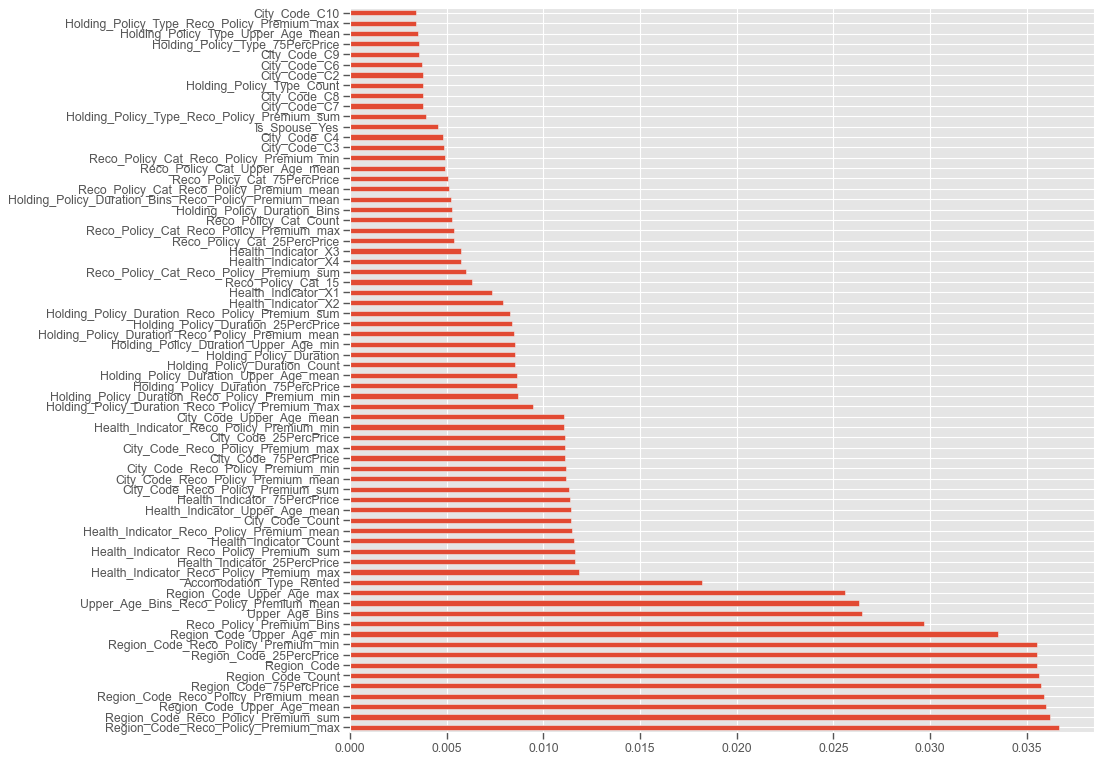

In [52]:
##### Check feature Importance #########

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) 
plt.style.use('ggplot')
plt.figure(figsize=(12,12))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(70).plot(kind='barh')
plt.show()

Region_Code related columns created using feature engineering are having highest importnacne

In [53]:
#Step 7: Model Building

#We will use XGBoost Classifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import  roc_auc_score

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

target = 'Response'

In [54]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Response'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(dtrain['Response'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(dtrain['Response'], dtrain_predprob))    


In [55]:
#Choose all predictors except target (i.e. Response Column) and call fit method
predictors = [x for x in train_df.columns if x not in [target]]

xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=25500,
 max_depth=35,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train_df, predictors)

[0]	train-auc:0.84629+0.00166	test-auc:0.64127+0.00555
[1]	train-auc:0.90594+0.00146	test-auc:0.66691+0.00437
[2]	train-auc:0.93093+0.00072	test-auc:0.68070+0.00294
[3]	train-auc:0.94315+0.00066	test-auc:0.69033+0.00517
[4]	train-auc:0.95025+0.00118	test-auc:0.69750+0.00642
[5]	train-auc:0.95479+0.00149	test-auc:0.70235+0.00688
[6]	train-auc:0.95886+0.00155	test-auc:0.70712+0.00645
[7]	train-auc:0.96197+0.00129	test-auc:0.71021+0.00640
[8]	train-auc:0.96443+0.00092	test-auc:0.71385+0.00631
[9]	train-auc:0.96660+0.00087	test-auc:0.71503+0.00609
[10]	train-auc:0.96812+0.00121	test-auc:0.71612+0.00633
[11]	train-auc:0.96950+0.00101	test-auc:0.71789+0.00625
[12]	train-auc:0.97063+0.00116	test-auc:0.71895+0.00643
[13]	train-auc:0.97178+0.00106	test-auc:0.72042+0.00643
[14]	train-auc:0.97270+0.00097	test-auc:0.72143+0.00648
[15]	train-auc:0.97342+0.00095	test-auc:0.72205+0.00595
[16]	train-auc:0.97446+0.00093	test-auc:0.72316+0.00596
[17]	train-auc:0.97500+0.00098	test-auc:0.72348+0.00606
[1

[146]	train-auc:0.99701+0.00018	test-auc:0.74149+0.00563
[147]	train-auc:0.99705+0.00018	test-auc:0.74150+0.00568
[148]	train-auc:0.99709+0.00018	test-auc:0.74156+0.00571
[149]	train-auc:0.99712+0.00018	test-auc:0.74159+0.00570
[150]	train-auc:0.99716+0.00018	test-auc:0.74159+0.00572
[151]	train-auc:0.99720+0.00018	test-auc:0.74159+0.00574
[152]	train-auc:0.99723+0.00018	test-auc:0.74162+0.00580
[153]	train-auc:0.99727+0.00018	test-auc:0.74164+0.00582
[154]	train-auc:0.99731+0.00018	test-auc:0.74165+0.00583
[155]	train-auc:0.99735+0.00017	test-auc:0.74167+0.00585
[156]	train-auc:0.99739+0.00017	test-auc:0.74174+0.00589
[157]	train-auc:0.99742+0.00017	test-auc:0.74179+0.00585
[158]	train-auc:0.99746+0.00017	test-auc:0.74175+0.00584
[159]	train-auc:0.99749+0.00017	test-auc:0.74178+0.00581
[160]	train-auc:0.99752+0.00017	test-auc:0.74178+0.00582
[161]	train-auc:0.99755+0.00016	test-auc:0.74179+0.00586
[162]	train-auc:0.99758+0.00016	test-auc:0.74177+0.00588
[163]	train-auc:0.99762+0.00016

[290]	train-auc:0.99939+0.00008	test-auc:0.74260+0.00591
[291]	train-auc:0.99940+0.00008	test-auc:0.74260+0.00591
[292]	train-auc:0.99940+0.00008	test-auc:0.74261+0.00591
[293]	train-auc:0.99941+0.00008	test-auc:0.74265+0.00591
[294]	train-auc:0.99941+0.00008	test-auc:0.74266+0.00588
[295]	train-auc:0.99942+0.00008	test-auc:0.74263+0.00588
[296]	train-auc:0.99943+0.00008	test-auc:0.74260+0.00587
[297]	train-auc:0.99943+0.00007	test-auc:0.74256+0.00584
[298]	train-auc:0.99944+0.00007	test-auc:0.74256+0.00581
[299]	train-auc:0.99944+0.00007	test-auc:0.74258+0.00580
[300]	train-auc:0.99945+0.00007	test-auc:0.74256+0.00581
[301]	train-auc:0.99945+0.00007	test-auc:0.74252+0.00578
[302]	train-auc:0.99945+0.00007	test-auc:0.74252+0.00577
[303]	train-auc:0.99946+0.00007	test-auc:0.74251+0.00578
[304]	train-auc:0.99946+0.00007	test-auc:0.74252+0.00577
[305]	train-auc:0.99947+0.00007	test-auc:0.74250+0.00579
[306]	train-auc:0.99947+0.00007	test-auc:0.74248+0.00579
[307]	train-auc:0.99948+0.00007

In [57]:
#Step 8: Predict class 1 probabilities on actual test dataset and create "CSV" file for final submission

pred_test = xgb1.predict_proba(X_main_test)[:, 1]

submission['Response'] = pred_test
submission.to_csv('./submission_xgb_one_outlier.csv',index=False)